In [19]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [20]:
# Import data
file_path = "../Project2/data/online_gaming_behavior_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [21]:
# Get df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

Looking at the content of the data frame DF, we see that we have a combination of numeric and string columns.

In [22]:
# check for NA's
df.isna().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [23]:
# assign y to EngangementLevel
y = df['EngagementLevel']
df = df.drop(columns=['EngagementLevel','PlayerID'])
df.head()


,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37


In [24]:
df['InGamePurchases'].unique()

array([0, 1], dtype=int64)

In [25]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([2, 2, 0, ..., 0, 2, 2])

In [26]:
# list classes
le.classes_

array(['High', 'Low', 'Medium'], dtype=object)

In [27]:
# lookup classes by number
le.inverse_transform([0])

array(['High'], dtype=object)

In [28]:
# look at unique values in object columns
obj_col = []
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"unique {col}: {df[col].unique()}")
        obj_col.append(col)

unique Gender: ['Male' 'Female']
unique Location: ['Other' 'USA' 'Europe' 'Asia']
unique GameGenre: ['Strategy' 'Sports' 'Action' 'RPG' 'Simulation']
unique GameDifficulty: ['Medium' 'Easy' 'Hard']


In [29]:

# encoded columns with objects to numeric values, get_dummies
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded,columns= obj_col,dtype='int',drop_first=True)
X = df_encoded
X

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Male,Location_Europe,Location_Other,Location_USA,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Hard,GameDifficulty_Medium
0,43,16.271119,0,6,108,79,25,1,0,1,0,0,0,0,1,0,1
1,29,5.525961,0,5,144,11,10,0,0,0,1,0,0,0,1,0,1
2,22,8.223755,0,16,142,35,41,0,0,0,1,0,0,1,0,0,0
3,35,5.265351,1,9,85,57,47,1,0,0,1,0,0,0,0,0,0
4,33,15.531945,0,2,131,95,37,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,20.619662,0,4,75,85,14,1,0,0,1,0,0,0,1,0,0
40030,44,13.539280,0,19,114,71,27,0,0,1,0,0,1,0,0,1,0
40031,15,0.240057,1,10,176,29,1,0,0,0,1,1,0,0,0,0,0
40032,34,14.017818,1,3,128,70,10,1,0,0,1,0,0,1,0,0,1


In [30]:

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   PlayTimeHours              40034 non-null  float64
 2   InGamePurchases            40034 non-null  int64  
 3   SessionsPerWeek            40034 non-null  int64  
 4   AvgSessionDurationMinutes  40034 non-null  int64  
 5   PlayerLevel                40034 non-null  int64  
 6   AchievementsUnlocked       40034 non-null  int64  
 7   Gender_Male                40034 non-null  int32  
 8   Location_Europe            40034 non-null  int32  
 9   Location_Other             40034 non-null  int32  
 10  Location_USA               40034 non-null  int32  
 11  GameGenre_RPG              40034 non-null  int32  
 12  GameGenre_Simulation       40034 non-null  int32  
 13  GameGenre_Sports           40034 non-null  int

In [31]:

# Split the data into training and testing sets using random_state=365
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=365)

In [32]:
# Scale columns for X_train and X_test
scale_col = ['Age','PlayTimeHours','SessionsPerWeek','AvgSessionDurationMinutes','PlayerLevel','AchievementsUnlocked']
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.49680109, -0.78441908, -0.50088452, ..., -0.50239271,
         2.        , -0.65493921],
       [-0.99512579,  1.63174671, -0.50088452, ...,  1.99047476,
        -0.5       , -0.65493921],
       [ 0.69917818,  1.16638518, -0.50088452, ..., -0.50239271,
        -0.5       ,  1.52685927],
       ...,
       [-0.69613097, -1.05925066, -0.50088452, ..., -0.50239271,
        -0.5       , -0.65493921],
       [ 1.69582757,  1.35944018, -0.50088452, ..., -0.50239271,
        -0.5       , -0.65493921],
       [-0.39713615, -1.35445716, -0.50088452, ..., -0.50239271,
        -0.5       ,  1.52685927]])

In [33]:
# # linear regression model
# lr = LogisticRegression()
# lr.fit(X_train_scaled,y_train)
# #predicted_y = lr.predict(X_test_scaled)

In [34]:
# # Validate the model by checking the model accuracy with model.score
# print(f"Training Data Score: {lr.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {lr.score(X_test_scaled, y_test)}")

In [35]:
# score = round(lr.score(X_train, y_train, sample_weight=None),5) 
# r2 = round(r2_score(y_test, predicted_y),5)
# #mse = round(mean_squared_error(y_test, predicted_y),4)
# #rmse = round(np.sqrt(mse),4)
# score
# r2

k: 1, Train/Test Score: 1.000/0.641
k: 3, Train/Test Score: 0.838/0.669
k: 5, Train/Test Score: 0.805/0.683
k: 7, Train/Test Score: 0.794/0.698
k: 9, Train/Test Score: 0.787/0.712
k: 11, Train/Test Score: 0.779/0.715
k: 13, Train/Test Score: 0.775/0.724
k: 15, Train/Test Score: 0.771/0.726
k: 17, Train/Test Score: 0.769/0.729
k: 19, Train/Test Score: 0.766/0.727
k: 21, Train/Test Score: 0.766/0.729
k: 23, Train/Test Score: 0.762/0.730
k: 25, Train/Test Score: 0.759/0.731
k: 27, Train/Test Score: 0.758/0.732
k: 29, Train/Test Score: 0.755/0.732
k: 31, Train/Test Score: 0.753/0.729
k: 33, Train/Test Score: 0.752/0.729
k: 35, Train/Test Score: 0.750/0.730
k: 37, Train/Test Score: 0.747/0.729
k: 39, Train/Test Score: 0.745/0.729


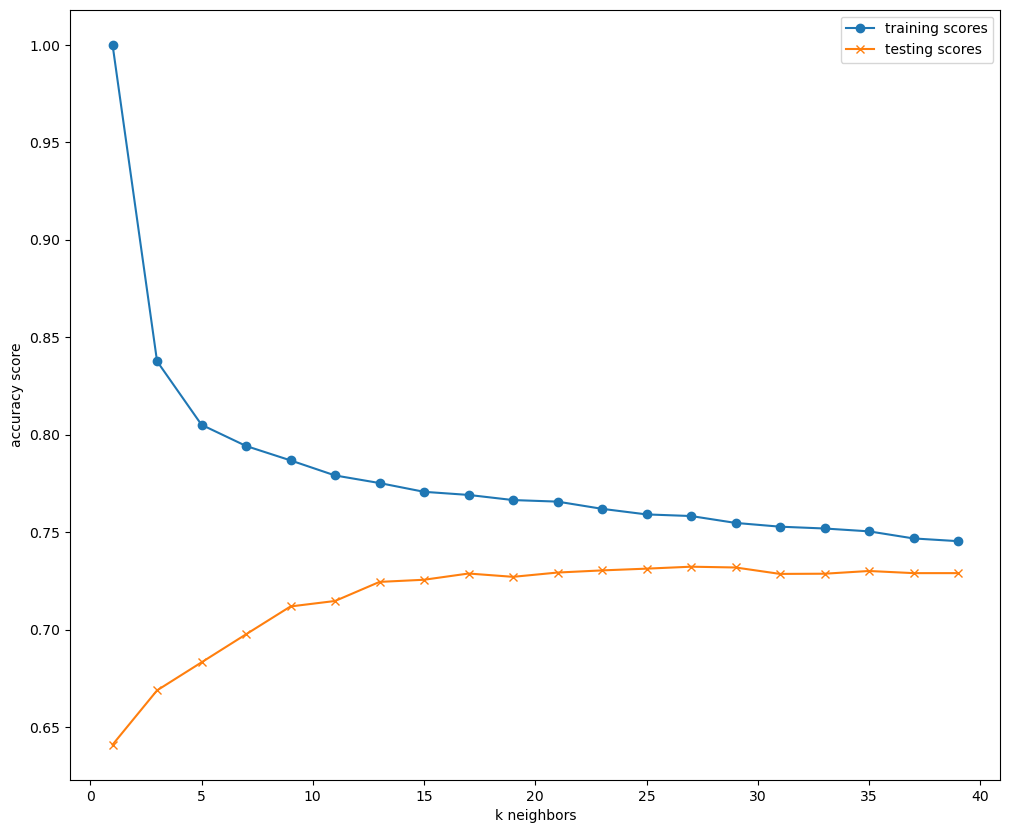

In [36]:

# Loop through different k values to find which has the highest accuracy.

train_scores = []
test_scores = []

for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.figure(figsize=(12,10))
plt.plot(range(1, 40, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 40, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [42]:
#setup models

knn_model = KNeighborsClassifier(n_neighbors=27)
lr_model = LogisticRegression(random_state=1)
svm_model = SVC(kernel='linear')
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

In [45]:
df_scores = pd.DataFrame()

def validate_model(model, X_train, y_train, X_test, y_test):
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    y_predict = knn_model.predict(X_test_scaled)
    r2 = round(r2_score(y_test,y_predict),5)
    return train_accuracy, test_accuracy, r2

def collectResults( model_label, train_acc, test_acc, r2):
    df_scores[model_label] = [train_acc, test_acc, abs(test_acc-train_acc),r2]
    print (df_scores)

In [46]:

# Logistic regression
lr_model.fit(X_train_scaled, y_train)
train_acc, test_acc = validate_model (lr_model,X_train_scaled, y_train, X_test_scaled, y_test)
collectResults("LR",train_acc,test_acc)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

0: High
1: Medium
2: Low

In [40]:
knn_model.fit(X_train_scaled,y_train)
train_acc, test_acc = validate_model (knn_model,X_train_scaled, y_train, X_test_scaled, y_test)
collectResults("KNN",train_acc,test_acc)

         LR       KNN
0  0.824979  0.758235
1  0.820961  0.732241
2  0.004018  0.025994


In [41]:
y_predict = knn_model.predict(X_test_scaled)
r2 = round(r2_score(y_test,y_predict),5)
r2

0.16483